In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
import os

df = pd.read_csv('./datasets/prices.csv', index_col=0)
df.head()



,symbol,open,close,low,high,volume
date,,,,,,
2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [18]:
# Filter dataframe only for chosen ticker symbol
dfa = df[df['symbol'] == 'GOOGL']
dfa.head()

,symbol,open,close,low,high,volume
date,,,,,,
2010-01-04,GOOGL,626.950006,626.750011,624.240011,629.510005,3908400.0
2010-01-05,GOOGL,627.180001,623.990017,621.540016,627.839984,6003300.0
2010-01-06,GOOGL,625.860033,608.260035,606.360021,625.860033,7949400.0
2010-01-07,GOOGL,609.400008,594.100015,592.649990,609.999993,12815700.0
2010-01-08,GOOGL,592.000005,602.020005,589.110015,603.250036,9439100.0


In [19]:
dfa.index.sort_values()

Index(['2010-01-04', '2010-01-05', '2010-01-06', '2010-01-07', '2010-01-08',
       '2010-01-11', '2010-01-12', '2010-01-13', '2010-01-14', '2010-01-15',
       ...
       '2016-12-16', '2016-12-19', '2016-12-20', '2016-12-21', '2016-12-22',
       '2016-12-23', '2016-12-27', '2016-12-28', '2016-12-29', '2016-12-30'],
      dtype='object', name='date', length=1762)

In [20]:
dfa.index = pd.to_datetime(dfa.index, format="%Y/%m/%d")

In [21]:
df_final = dfa.drop(['symbol', 'open', 'low', 'high', 'volume'], axis=1)

In [22]:
df_final = pd.Series(df_final['close'])

In [23]:
type(df_final)

pandas.core.series.Series

In [24]:
def check_stationarity(ts_data):
    roll_mean = ts_data.rolling(30).mean()
    roll_std = ts_data.rolling(5).std()

    fig = plt.figure(figsize=(20,10))
    plt.subplot(211)
    plt.plot(ts_data, color='black', label='Original Data')
    plt.plot(roll_mean, color='red', label='Rolling Mean(30 days)')
    plt.legend()
    plt.subplot(212)
    plt.plot(roll_std, color='green', label='Rolling std dev (5 days)')
    plt.legend()

    print('Dickey-Fuller test results\n')
    df_test = adfuller(ts_data, regresults=False)
    test_result = pd.Series(df_test[0:4], index=['Test Statistics', 'p-value', '# of lags', '# of obs'])
    print(test_result)
    for k,v in df_test[4].items():
        print('Critical value at %s: %1.5f' %(k,v))

Dickey-Fuller test results

Test Statistics      -2.228300
p-value               0.196135
# of lags             1.000000
# of obs           1760.000000
dtype: float64
Critical value at 1%: -3.43407
Critical value at 5%: -2.86318
Critical value at 10%: -2.56764


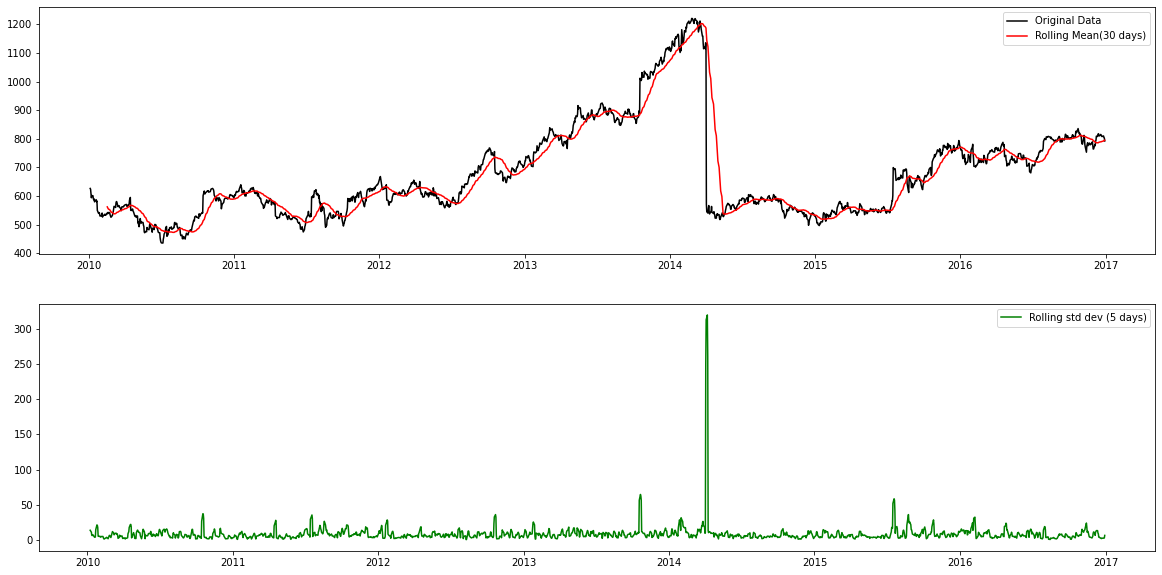

In [25]:
check_stationarity(df_final)